# Data Exploration

Use data cleaning code from the `data_cleaning` file. Make graphs for initial data exploration. Play around with the dataframes to learn more about data.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
warnings.filterwarnings('ignore')

__Streetlamp Locations on Map__ use the `streetlights` dataset to plot the location of lamps on a map of Boston. First read in all the files, then perform the necessary data cleaning, and then plot the streetlamps using their longitude and latitude and the python library `geopandas`.

In [2]:
# import boston map
boston_map = gpd.read_file('Boston_Neighborhoods/Boston_Neighborhoods.shp')

# import street lamp dataset and clean
streetlights_full = pd.read_csv('data/streetlight_locations.csv')
streetlights      = streetlights_full.drop(['TYPE','OBJECTID'],axis=1)

# get logistics for plotting
geometry = [Point(xy) for xy in zip(streetlights.Long,streetlights.Lat)]
df       = pd.DataFrame(np.ones(len(streetlights)))
geo_df   = gpd.GeoDataFrame(df,crs={'init': 'epsg:4326'},geometry=geometry)

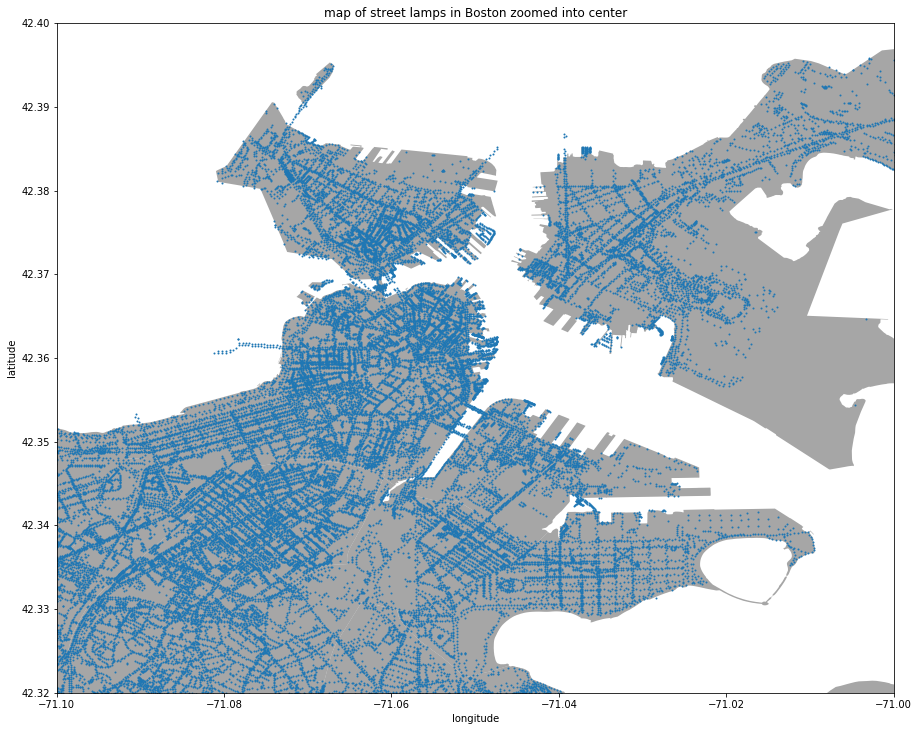

In [3]:
fig,ax = plt.subplots(figsize=(15,15))

# plot on same map zoomed in for better understanding
boston_map.plot(ax=ax,alpha=0.7,color='grey')
geo_df.plot(ax=ax,markersize=1)

# plot formatting
plt.title('map of street lamps in Boston zoomed into center')
plt.xlabel('longitude'); plt.ylabel('latitude');
plt.xlim(-71.1,-71.0)
plt.ylim(42.32,42.4)
plt.show()

# save to .jpg file for later
fig.savefig('streetlight_map_zoomed.jpg')

__Crime Incident Locations on Map__ create the same plot as above, but now for the crimes dataset. Color the crimes based on if a shooting was involved or not.

In [4]:
# import crimes dataset and clean
crime_incidents_full  = pd.read_csv('data/crime_incident_reports.csv')
crime_cols_drop = ['INCIDENT_NUMBER','UCR_PART','Location']
crime_incidents_ = crime_incidents_full.drop(crime_cols_drop,axis=1)
crime_incidents = crime_incidents_.dropna(subset=['Lat','Long'])
crime_incidents = crime_incidents[crime_incidents.Lat != 0]
crime_incidents = crime_incidents[crime_incidents.Long != -1]
crime_incidents['SHOOTING'].fillna(0,inplace=True)
crime_incidents['SHOOTING'].replace('Y',1,inplace=True)

# get logistics for plotting
geometry = [Point(xy) for xy in zip(crime_incidents.Long,crime_incidents.Lat)]
geo_df   = gpd.GeoDataFrame(crime_incidents['SHOOTING'],crs={'init': 'epsg:4326'},geometry=geometry)

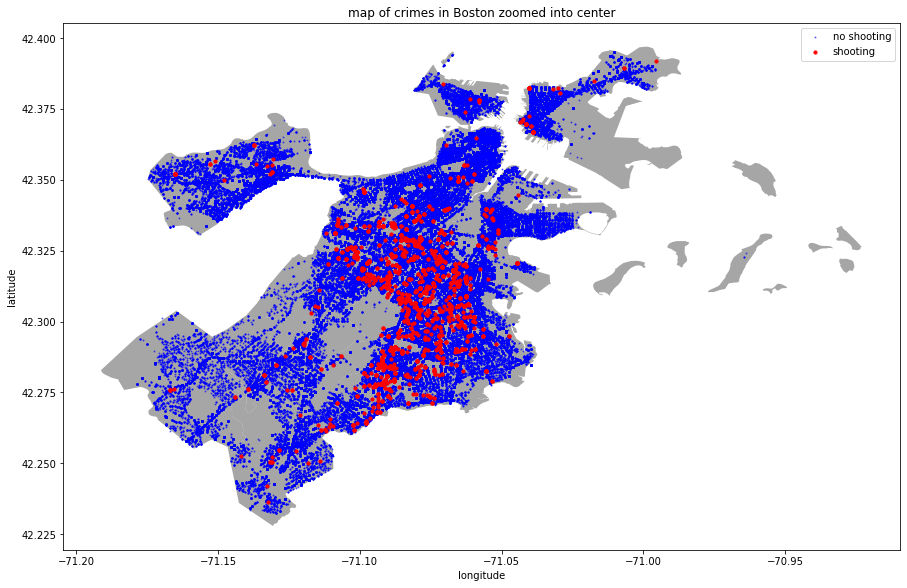

In [5]:
fig,ax = plt.subplots(figsize=(15,15))

# plot on same map full size to see where shootings are
boston_map.plot(ax=ax,alpha=0.7,color='grey')
geo_df[geo_df['SHOOTING'] == 0].plot(ax=ax,markersize=1,color='blue',label='no shooting',alpha=0.5)
geo_df[geo_df['SHOOTING'] == 1].plot(ax=ax,markersize=10,color='red',label='shooting')

# plot formatting
plt.title('map of crimes in Boston zoomed into center')
plt.xlabel('longitude'); plt.ylabel('latitude');
plt.legend()
plt.show()

# save to .jpg file for later
fig.savefig('crime_incidents_map.jpg')

__Crime Type Histogram__ to get a sense of the types of crimes being committed, create a histogram for the most common types of crimes.

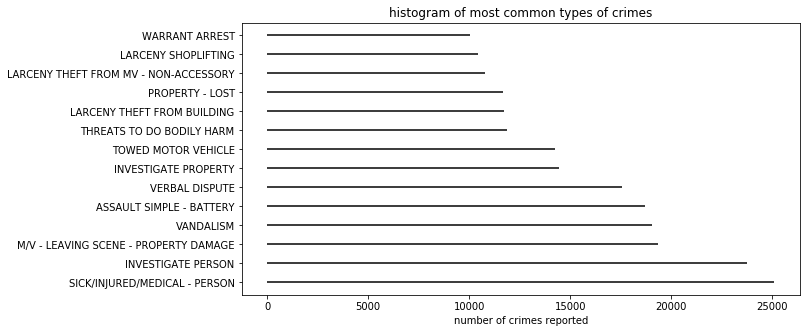

In [6]:
fig = plt.figure(figsize=(10,5))

# get top 14 crimes (everything with a count over 10,000)
counts = [x for x in crime_incidents.OFFENSE_DESCRIPTION.value_counts() if x > 10000]
names  = crime_incidents.OFFENSE_DESCRIPTION.value_counts().index[0:14]

# plot horizontal histogram
plt.hlines(names,0,counts)

# plot formatting
plt.title('histogram of most common types of crimes')
plt.xlabel('number of crimes reported')
plt.show()

# save to .jpg for later
fig.savefig('types_crime_histogram.jpg')

__Property Value Histogram__ to see what the range of property values is. 

In [7]:
# import and clean property values dataset
property_2019_full = pd.read_csv('data/property-assessment-fy2019.csv')
property_cols = ['ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM','ZIPCODE','AV_LAND','AV_BLDG','AV_TOTAL','GROSS_TAX']
property_2019_ = property_2019_full[property_2019_full.columns[property_2019_full.columns.isin(property_cols)]]
def property_droprows(df): 
    return(df[(df.AV_LAND != 0)  | (df.AV_BLDG != 0) | (df.AV_TOTAL != 0) | (df.GROSS_TAX != 0)])
property_2019 = property_droprows(property_2019_)

# print out max because this is crazy
print('maximum property worth:',property_2019.AV_TOTAL.max())

maximum property worth: 2111308200


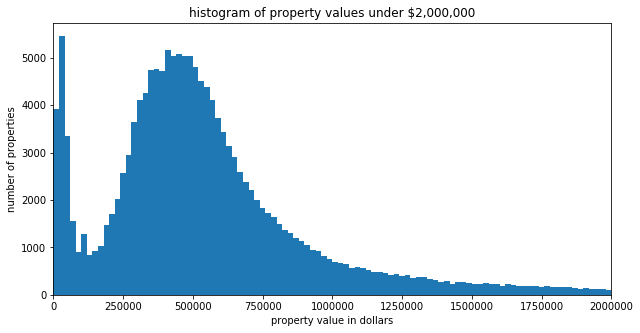

In [8]:
fig = plt.figure(figsize=(10,5))

# plot all values lower than 2,000,000
plt.hist(property_2019.AV_TOTAL[property_2019.AV_TOTAL < 2000000],bins=100)

# plot formatting
plt.title('histogram of property values under $2,000,000')
plt.xlabel('property value in dollars')
plt.ylabel('number of properties')
plt.xlim(0,2000000)
plt.show()

# save to .jpg for later
fig.savefig('property_values_histogram.jpg')